In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 
%matplotlib inline


In [ ]:
# DATA GENERATIION
x = np.random.randint(low=1 , high=200 ,size=100)
y = [3*elem +4 for elem in x]

# ADD NOISE
for i in range(40):
  index = random.randint(0,99)
  y[index] = (random.random()+0.01)*y[index]


for i in range(40):
  index = random.randint(0,99)
  y[index] = (random.random()+1)*y[index]


In [ ]:
df = pd.DataFrame({'X':x,'Price':y})
df

,X,Price
0,131,397.000000
1,15,49.000000
2,16,52.000000
3,121,213.808414
4,19,61.000000
...,...,...
95,30,60.065834
96,24,76.000000
97,35,14.718986
98,132,3.823564


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    int64  
 1   Price   100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [ ]:
df.describe()

,X,Price
count,100.000000,100.000000
mean,97.970000,317.312416
std,55.015233,290.344584
min,4.000000,3.823564
25%,52.500000,113.895688
50%,98.000000,277.000000
75%,134.250000,436.750000
max,199.000000,1966.233428


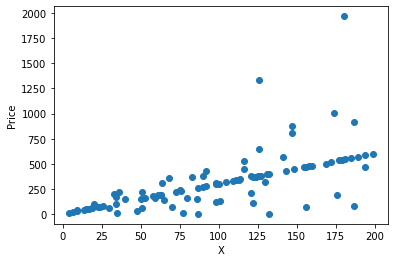

In [ ]:
plt.xlabel("X")
plt.ylabel("Price")
plt.scatter(df.X, df.Price)

In [ ]:
class LinearReg: 

    def __init__(self):
      self.b0=0
      self.b1=0

    def train(self, df):
      # LINEAR REGRESSION

      # MEAN
      x_mean = df.X.mean()
      y_mean = df.Price.mean()
      n = len(df)

      # Calc coef
      numerator=0
      denominator=0

      for i in range(n):
        numerator+=(df.X[i] - x_mean)*(df.Price[i] - y_mean)
        denominator += (df.X[i] - x_mean)**2

      self.b1 = numerator/denominator
      self.b0 = y_mean - (self.b1*x_mean)

    def predict(self ,x):
      return self.b1*x + self.b0
    
    def coef(self):
      print("**** CO-EFFICIENTS ****")
      print(" SLOPE (b1) :{}".format(self.b1))
      print(" BIAS (b0) : {}".format(self.b0) )
      return self.b1, self.b0



In [ ]:
lg = LinearReg()
lg.train(df)
lg_b1, lg_b0 = lg.coef()

**** CO-EFFICIENTS ****
 SLOPE (b1) :3.456956507559671
 BIAS (b0) : -21.365612820143213


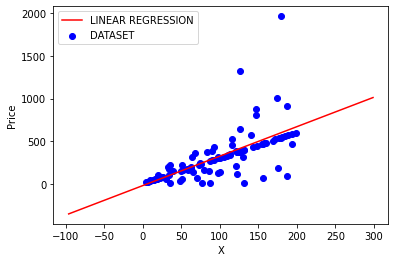

In [ ]:
x_max = np.max(df.X) + 100
x_min = np.min(df.X) - 100

x = np.linspace(x_min, x_max, 1000)
y_pred = lg_b0 + lg_b1*x

#plotting line 
plt.plot(x, y_pred, color='red', label='LINEAR REGRESSION')
#plot the data point
plt.scatter(df.X, df.Price, color='blue', label='DATASET')
# x-axis label
plt.xlabel('X')
#y-axis label
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
rmse = 0
N = len(df)

for i in range(N):
    y_pred=  lg_b0 + lg_b1* df.X[i]
    rmse += (df.Price[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/N)
print("RSME : ", rmse)

RSME :  218.28478137263855


In [ ]:
x_mean = df.X.mean()
y_mean = df.Price.mean()

sumofsquares = 0
sumofresiduals = 0
for i in range(N) :
    y_pred = lg_b0 + lg_b1 * df.X[i]
    sumofsquares += (df.Price[i] - y_mean) ** 2
    sumofresiduals += (df.Price[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print("R2 SCORE : " , score)

R2 SCORE :  0.4290681589461085
